In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DataSets/Boston Housing/housing.data', delimiter=r"\s+")
column_names= ['Crime Rate', 'Residential Land Zoned', 'Non-retail Business Acres', 'Charles River Dummy', 'Nitric Oxides Concentration',
              'Rooms per Dwelling', 'Owner Occupied pre1940', 'Weighted Distance to Employment Centres', 'Radial Highway Accessibility Index',
              'Property Tax', 'Pupil Teacher Ratio', 'Blacks', 'Lower Status', 'Median Value']

df.shape
df.columns = column_names

In [6]:
df.head()

,Crime Rate,Residential Land Zoned,Non-retail Business Acres,Charles River Dummy,Nitric Oxides Concentration,Rooms per Dwelling,Owner Occupied pre1940,Weighted Distance to Employment Centres,Radial Highway Accessibility Index,Property Tax,Pupil Teacher Ratio,Blacks,Lower Status,Median Value
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [7]:
RD = 'Rooms per Dwelling'
MV = 'Median Value'

In [8]:
x = df[RD].values.reshape(-1,1)
y = df[MV].values

In [10]:
pairs = [(sample[0],y[idx]) for idx,sample in enumerate(x)]

In [ ]:
x = df['Lower Status'].values.reshape(-1,1)

# Robust Regression

Linear Regression is heavily affected by a few outliers. There is a need for a correction or a workaround this issue.

Strategy is to define how to detect an outlier and seperate it from the inliers.
We need to decide on a model that classifies our data into inliers and outliers. The catch is that this model needs do be generated from the data itself.

Solution Proposal:

1-> Generate a model using random sampling of N samples.

2-> Fit a model to this N samples.

3-> Predict all the data using this model.

4-> Set a threshold for inlier/outlier boundry.

5-> Choose the model that has the least outliers as our most robust model.

In [11]:
from sklearn.linear_model import RANSACRegressor

In [12]:
ransac = RANSACRegressor()

In [13]:
ransac.fit(x,y)

RANSACRegressor()

In [15]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [20]:
line_X = np.arange(3,10,1)
line_y_Ransac = ransac.predict(line_X.reshape(-1,1))

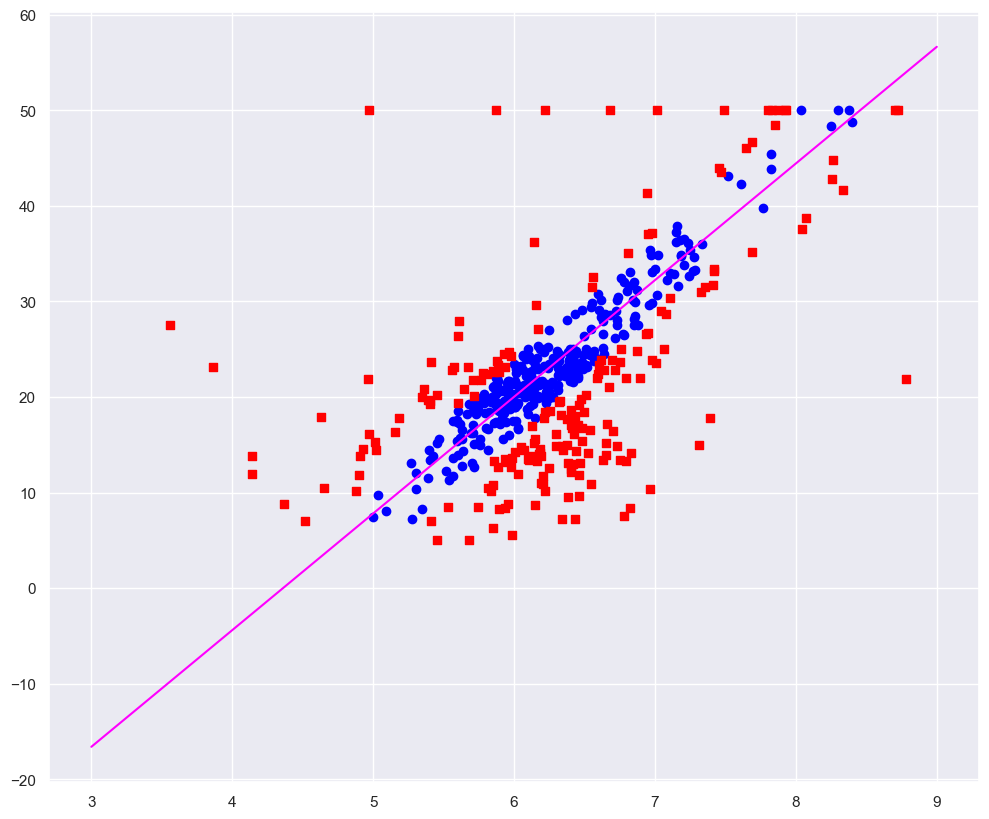

In [24]:
sns.set(style = 'darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='red',marker='s',label='outliers')
plt.plot(line_X,line_y_Ransac,color='magenta')